Q-11. Given the data of a feature contributing to different classes
https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp
=share_
a. Check whether the distribution of all the classes are the same or not.
b. Check for the equality of variance/
c. Which amount LDA and QDA would perform better on this data for
classification and why.
d. Check the equality of mean for between all the classes.

In [1]:
import scipy.stats as stats
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
df = pd.read_csv("dataq11.csv")

In [3]:
df

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


### a. Checking the distribution of classes using paired t-test


In [4]:
t_statistic, p_value = stats.ttest_rel(df[' Blood Pressure Before (mmHg)'], df[' Blood Pressure After (mmHg)'])
print("a. Paired t-test p-value:", p_value)

a. Paired t-test p-value: 2.817165090364283e-61


### b. Checking the equality of variance using Levene's test


In [5]:
statistic, p_value = stats.levene(df[' Blood Pressure Before (mmHg)'], df[' Blood Pressure After (mmHg)'])
print("b. Levene's test p-value:", p_value)


b. Levene's test p-value: 0.6715080090945376


In [6]:
# Selecting the columns of interest for covariance analysis
selected_columns = [' Blood Pressure Before (mmHg)', ' Blood Pressure After (mmHg)']
selected_data = df[selected_columns]

# Computing the covariance matrix
covariance_matrix = np.cov(selected_data.T)

# Printing the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)



Covariance Matrix:
[[43.53727273 44.44686869]
 [44.44686869 47.44484848]]


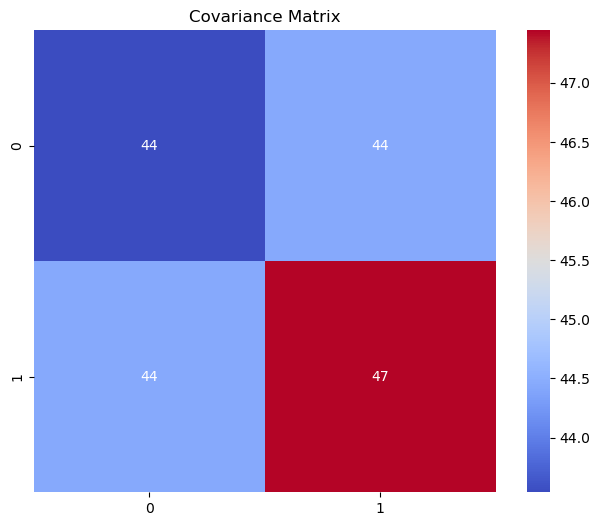

In [7]:
# Visualizing the covariance matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Covariance Matrix')
plt.show()

### COMPARING LDA AND QDA

In [8]:
X = df[[' Blood Pressure Before (mmHg)']]
y = df[' Blood Pressure After (mmHg)']


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Performing LDA classification
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_predictions = lda.predict(X_test)
lda_accuracy = accuracy_score(y_test, lda_predictions)
print("LDA Accuracy:", lda_accuracy)

LDA Accuracy: 0.6


In [9]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Assuming you have already prepared your training and testing data as X_train, X_test, y_train, y_test

# Perform oversampling on the training data
oversampler = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Perform QDA classification with the oversampled data
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_oversampled, y_train_oversampled)
qda_predictions = qda.predict(X_test)
qda_accuracy = accuracy_score(y_test, qda_predictions)
print("QDA Accuracy:", qda_accuracy)


QDA Accuracy: 0.05


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:954: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:955: RuntimeWarning: invalid value encountered in add
  return -0.5 * (norm2 + u) + np.log(self.priors_)


### d. Checking the equality of means using paired t-test


In [10]:
t_statistic, p_value = stats.ttest_rel(df[' Blood Pressure Before (mmHg)'], df[' Blood Pressure After (mmHg)'])
print("d. Paired t-test p-value:", p_value)


d. Paired t-test p-value: 2.817165090364283e-61
